<a href="https://colab.research.google.com/github/Tejasaisathwik/-I/blob/main/museum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch torchvision
!pip install gtts deepface googletrans==4.0.0-rc1 pytorch-lightning
!pip install timm
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from PIL import Image
import requests
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

In [3]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [4]:
def generate_caption(image_path1, image_path2):
    raw_image = Image.open('/content/great wall.jpg').convert('RGB')
    raw_image = Image.open('/content/thunder.jpg').convert('RGB')
    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

In [5]:
from gtts import gTTS
import IPython.display as display

In [6]:
def speak_text(text, lang='en'):
    tts = gTTS(text, lang=lang)
    audio_path = "/content/museum voice.mp3"
    tts.save(audio_path)
    display.display(display.Audio(audio_path, autoplay=True))

In [7]:
from transformers import BlipForQuestionAnswering

In [8]:
vqa_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [9]:
def answer_visual_question(image_path, question):
    raw_image = Image.open(image_path).convert('RGB')
    inputs = processor(raw_image, question, return_tensors="pt")
    out = vqa_model.generate(**inputs)
    answer = processor.decode(out[0], skip_special_tokens=True)
    return answer

In [10]:
print(answer_visual_question("/content/great wall.jpg", "What is this monument?"))

castle


In [11]:
from googletrans import Translator

In [12]:
translator = Translator()

In [13]:

def translate_text(text, dest_lang='fr'):
    result = translator.translate(text, dest=dest_lang)
    return result.text

In [14]:
print(translate_text("The Great Wall of China", "ja"))

中国の万里の長城


In [15]:
from deepface import DeepFace

25-05-23 03:54:26 - Directory /root/.deepface has been created
25-05-23 03:54:26 - Directory /root/.deepface/weights has been created


In [16]:
def detect_emotion(image_path):
    result = DeepFace.analyze(img_path='/content/great wall.jpg', actions=['emotion'], enforce_detection=False)
    return result[0]['dominant_emotion']

In [17]:
print(detect_emotion("/content/great wall.jpg"))

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5


25-05-23 03:54:56 - facial_expression_model_weights.h5 will be downloaded...


100%|██████████| 5.98M/5.98M [00:00<00:00, 209MB/s]


happy


In [18]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 17483 (delta 77), reused 29 (delta 29), pack-reused 17378 (from 4)
Receiving objects: 100% (17483/17483), 16.35 MiB | 25.64 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00


In [19]:
import torch

In [20]:
def detect_objects(image_path):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    results = model(image_path)
    results.show()
    return results.pandas().xyxy[0]

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-23 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 154MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


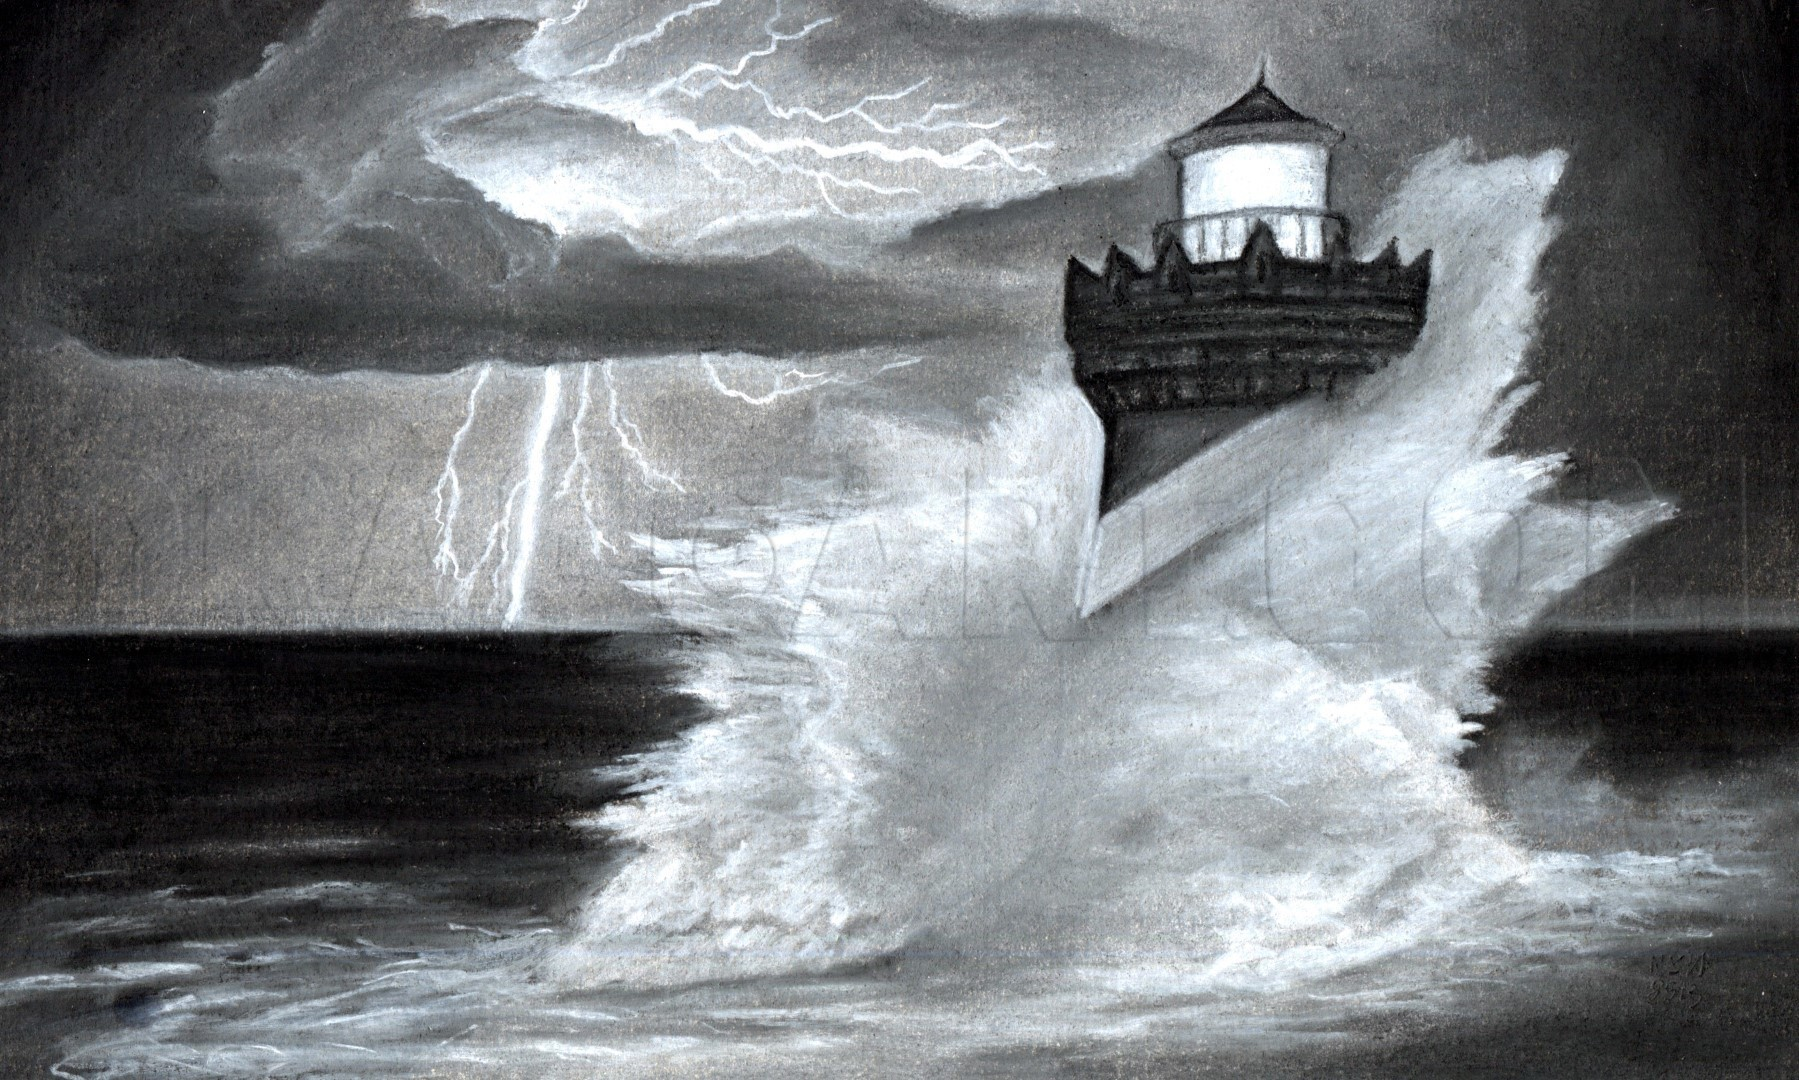

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [21]:
detect_objects("/content/thunder.jpg")

In [22]:
def museum_ai_pipeline(image_path, question=None, lang='en'):
    caption = generate_caption(image_path, image_path)
    print("Caption:", caption)
    speak_text(caption, lang)

    if question:
        answer = answer_visual_question(image_path, question)
        print("VQA Answer:", answer)
        speak_text(answer, lang)

    translation = translate_text(caption, dest_lang=lang)
    print(f"Translated ({lang}):", translation)
    speak_text(translation, lang)

    try:
        emotion = detect_emotion(image_path)
        print("Detected Emotion:", emotion)
    except:
        emotion = "N/A"

    obj_result = detect_objects(image_path)
    print("Detected Objects:\n", obj_result[['name', 'confidence']])

    return {
        "caption": caption,
        "translated_caption": translation,
        "emotion": emotion,
        "objects": obj_result[['name', 'confidence']].to_dict(orient='records')
    }

In [23]:
# This code has been moved to the museum_ai_pipeline function.
# translation = translate_text(caption, dest_lang=lang)
# print(f"Translated ({lang}):", translation)
# speak_text(translation, lang)

In [24]:
    try:
        emotion = detect_emotion(image_path)
        print("Detected Emotion:", emotion)
    except:
        emotion = "N/A"

In [25]:
# This code has been moved to the museum_ai_pipeline function.
# obj_result = detect_objects(image_path)
# print("Detected Objects:\n", obj_result[['name', 'confidence']])

In [26]:
# This code has been moved to the museum_ai_pipeline function.
# return {
#     "caption": caption,
#     "translated_caption": translation,
#     "emotion": emotion,
#     "objects": obj_result[['name', 'confidence']].to_dict(orient='records')
# }

Caption: a lighthouse in the middle of a storm


VQA Answer: storm


Translated (es): un faro en medio de una tormenta


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-23 Python-3.11.12 torch-2.6.0+cu124 CPU



Detected Emotion: happy


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


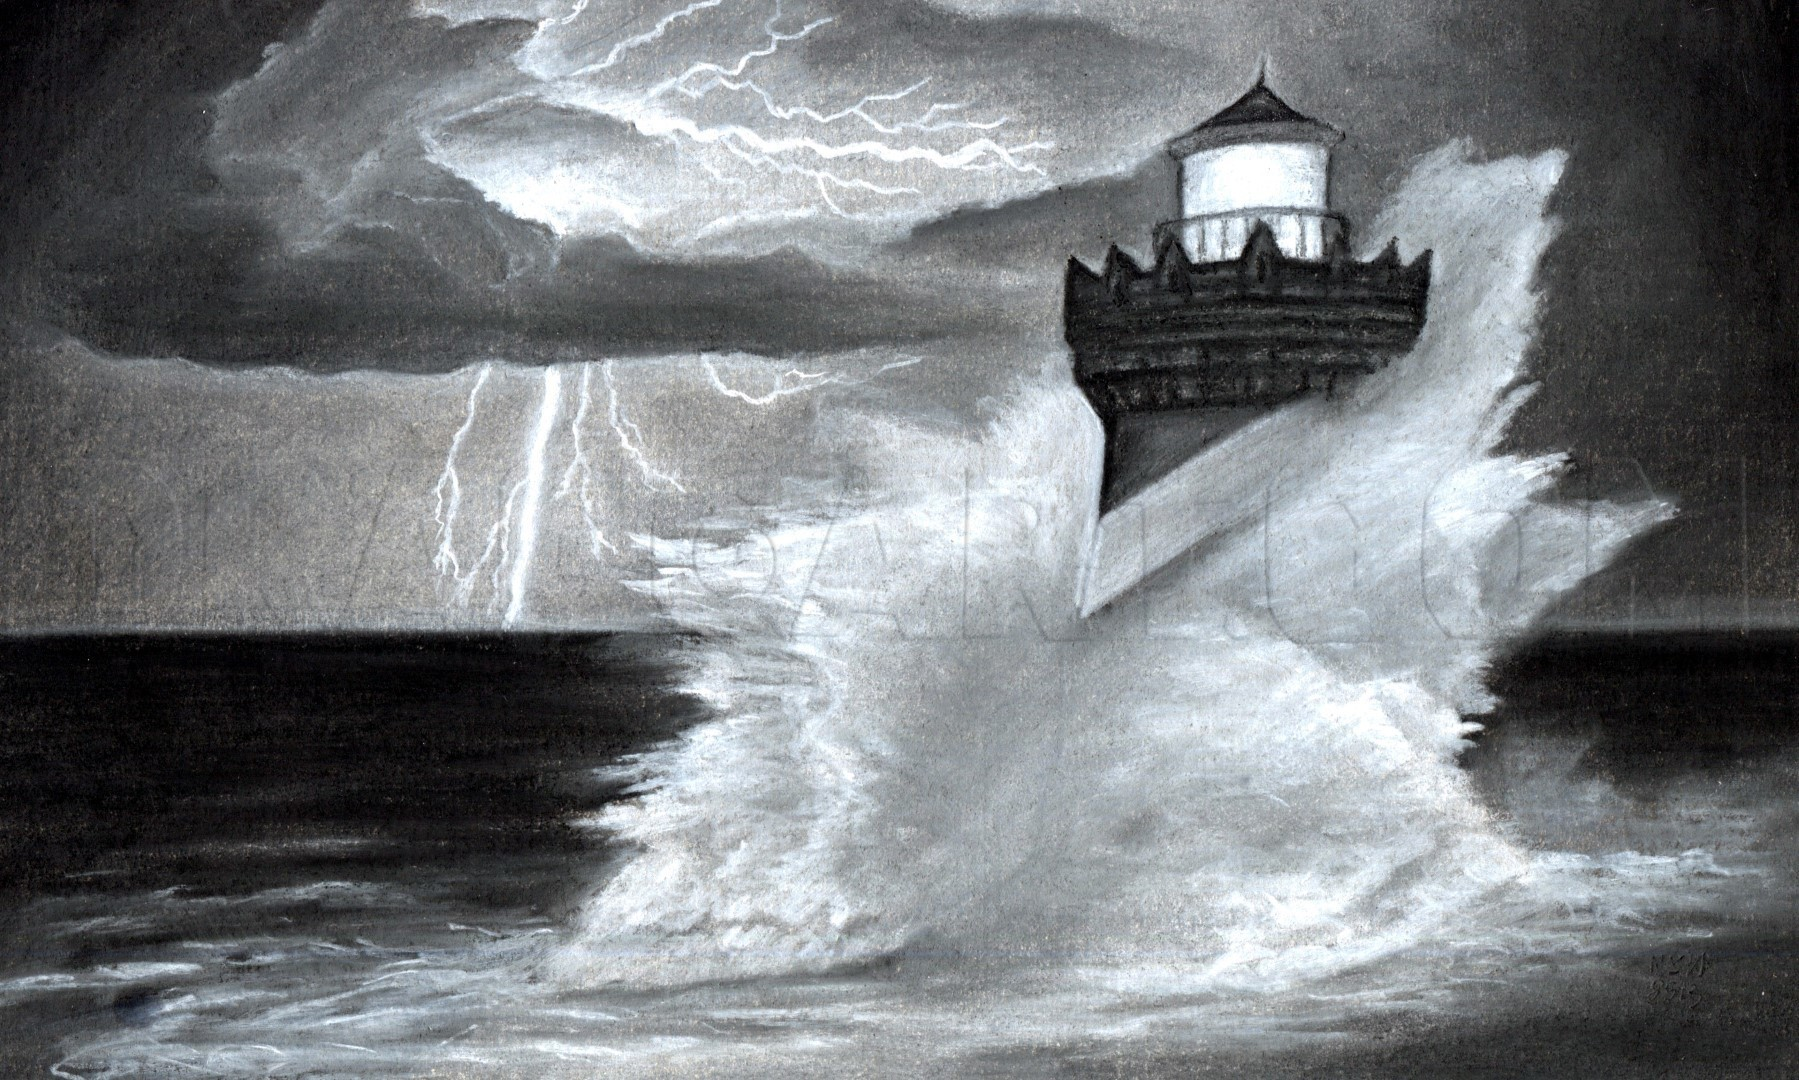

Detected Objects:
 Empty DataFrame
Columns: [name, confidence]
Index: []


{'caption': 'a lighthouse in the middle of a storm',
 'translated_caption': 'un faro en medio de una tormenta',
 'emotion': 'happy',
 'objects': []}

In [27]:
museum_ai_pipeline("/content/thunder.jpg", question="What is happening in this painting?", lang='es')

Caption: a lighthouse in the middle of a storm


VQA Answer: castle


Translated (es): un faro en medio de una tormenta


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-23 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 


Detected Emotion: happy


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


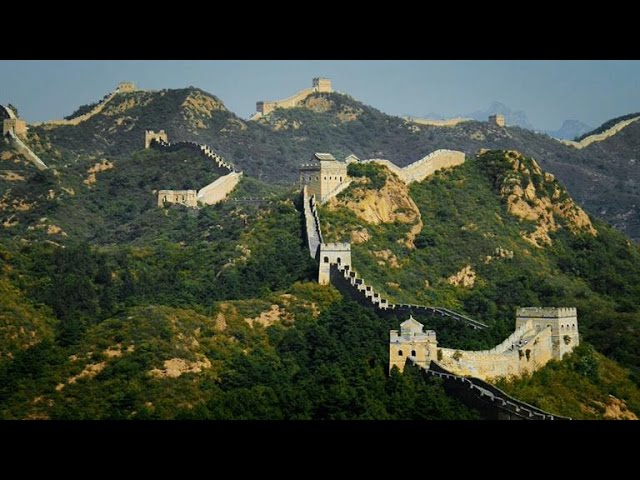

Detected Objects:
 Empty DataFrame
Columns: [name, confidence]
Index: []


{'caption': 'a lighthouse in the middle of a storm',
 'translated_caption': 'un faro en medio de una tormenta',
 'emotion': 'happy',
 'objects': []}

In [28]:
museum_ai_pipeline("/content/great wall.jpg", question="What is this monument?", lang='es')